In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.set(style='whitegrid')

In [18]:
df = pd.read_csv('C:\\Users\\mdimp\\Downloads\\train.csv')


In [20]:
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

Shape of dataset: (891, 12)

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Summary statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.0

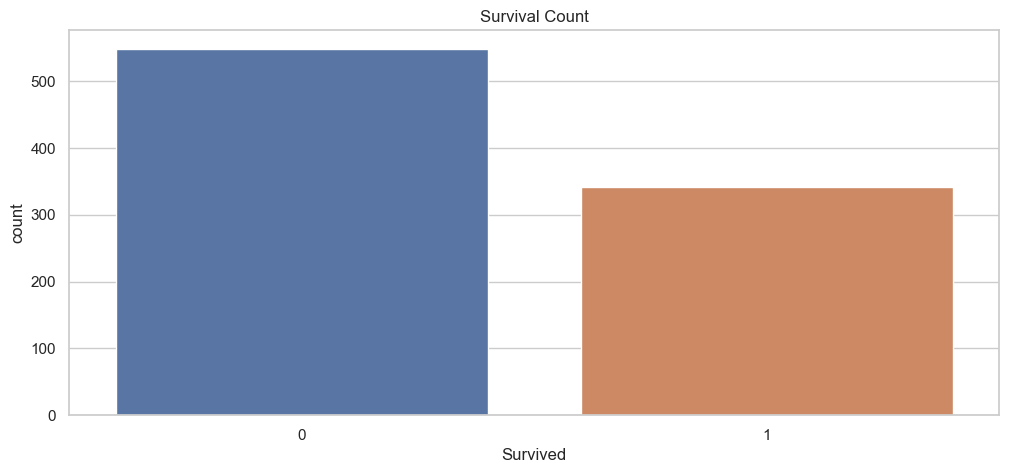

In [22]:
plt.figure(figsize=(12, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


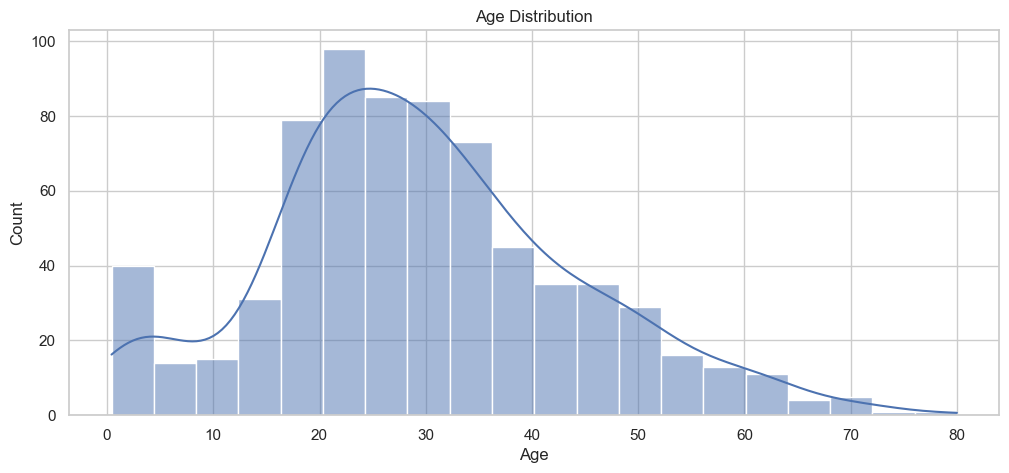

In [24]:
plt.figure(figsize=(12, 5))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()


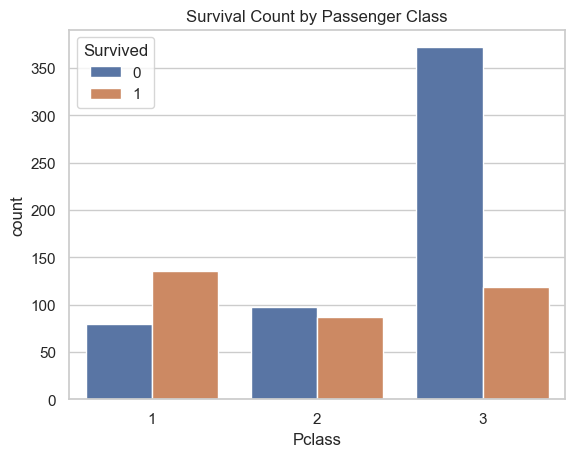

In [26]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()


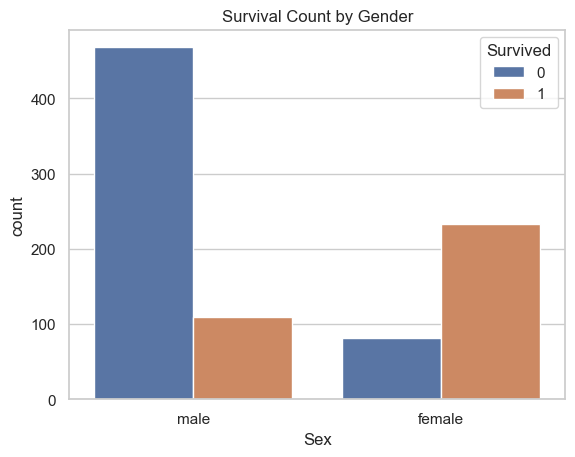

In [28]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()

In [30]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [32]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [34]:
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs',
    'Master': 'Master', 'Dr': 'Rare', 'Rev': 'Rare',
    'Col': 'Rare', 'Major': 'Rare', 'Mlle': 'Miss',
    'Ms': 'Miss', 'Lady': 'Rare', 'Countess': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Sir': 'Rare',
    'Mme': 'Mrs', 'Capt': 'Rare'}
df['Title'] = df['Title'].map(title_mapping)

In [36]:
print("\nKey Insights:")
print("1. Females had higher survival rates than males.")
print("2. Passengers in higher classes (Pclass 1) were more likely to survive.")
print("3. Children and those with smaller family sizes had better survival chances.")
print("4. Titles and family size provide valuable features for prediction.")


Key Insights:
1. Females had higher survival rates than males.
2. Passengers in higher classes (Pclass 1) were more likely to survive.
3. Children and those with smaller family sizes had better survival chances.
4. Titles and family size provide valuable features for prediction.


In [38]:
df.to_csv('titanic_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'titanic_cleaned.csv'")


Cleaned dataset saved as 'titanic_cleaned.csv'
